In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("customer_churn_prediction.csv")

## Overview of the project.

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


## Data Understanding

In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


## Checking the Null Values

In [16]:
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


## Checking the mean of the null values if the mean is less we can drop the columns from the dataset

In [7]:
df.isnull().mean()*100

,0
CustomerID,0.000227
Age,0.000227
Gender,0.000227
Tenure,0.000227
Usage Frequency,0.000227
Support Calls,0.000227
Payment Delay,0.000227
Subscription Type,0.000227
Contract Length,0.000227
Total Spend,0.000227


## Dropping the rows from the dataset and printing them

In [8]:

missing_values = df.isnull().sum()


df_cleaned = df.dropna()


missing_values_after = df_cleaned.isnull().sum()
summary_stats = df_cleaned.describe()

missing_values, missing_values_after

(CustomerID           1
 Age                  1
 Gender               1
 Tenure               1
 Usage Frequency      1
 Support Calls        1
 Payment Delay        1
 Subscription Type    1
 Contract Length      1
 Total Spend          1
 Last Interaction     1
 Churn                1
 dtype: int64,
 CustomerID           0
 Age                  0
 Gender               0
 Tenure               0
 Usage Frequency      0
 Support Calls        0
 Payment Delay        0
 Subscription Type    0
 Contract Length      0
 Total Spend          0
 Last Interaction     0
 Churn                0
 dtype: int64)

## Creating Subplots for the numerical columns

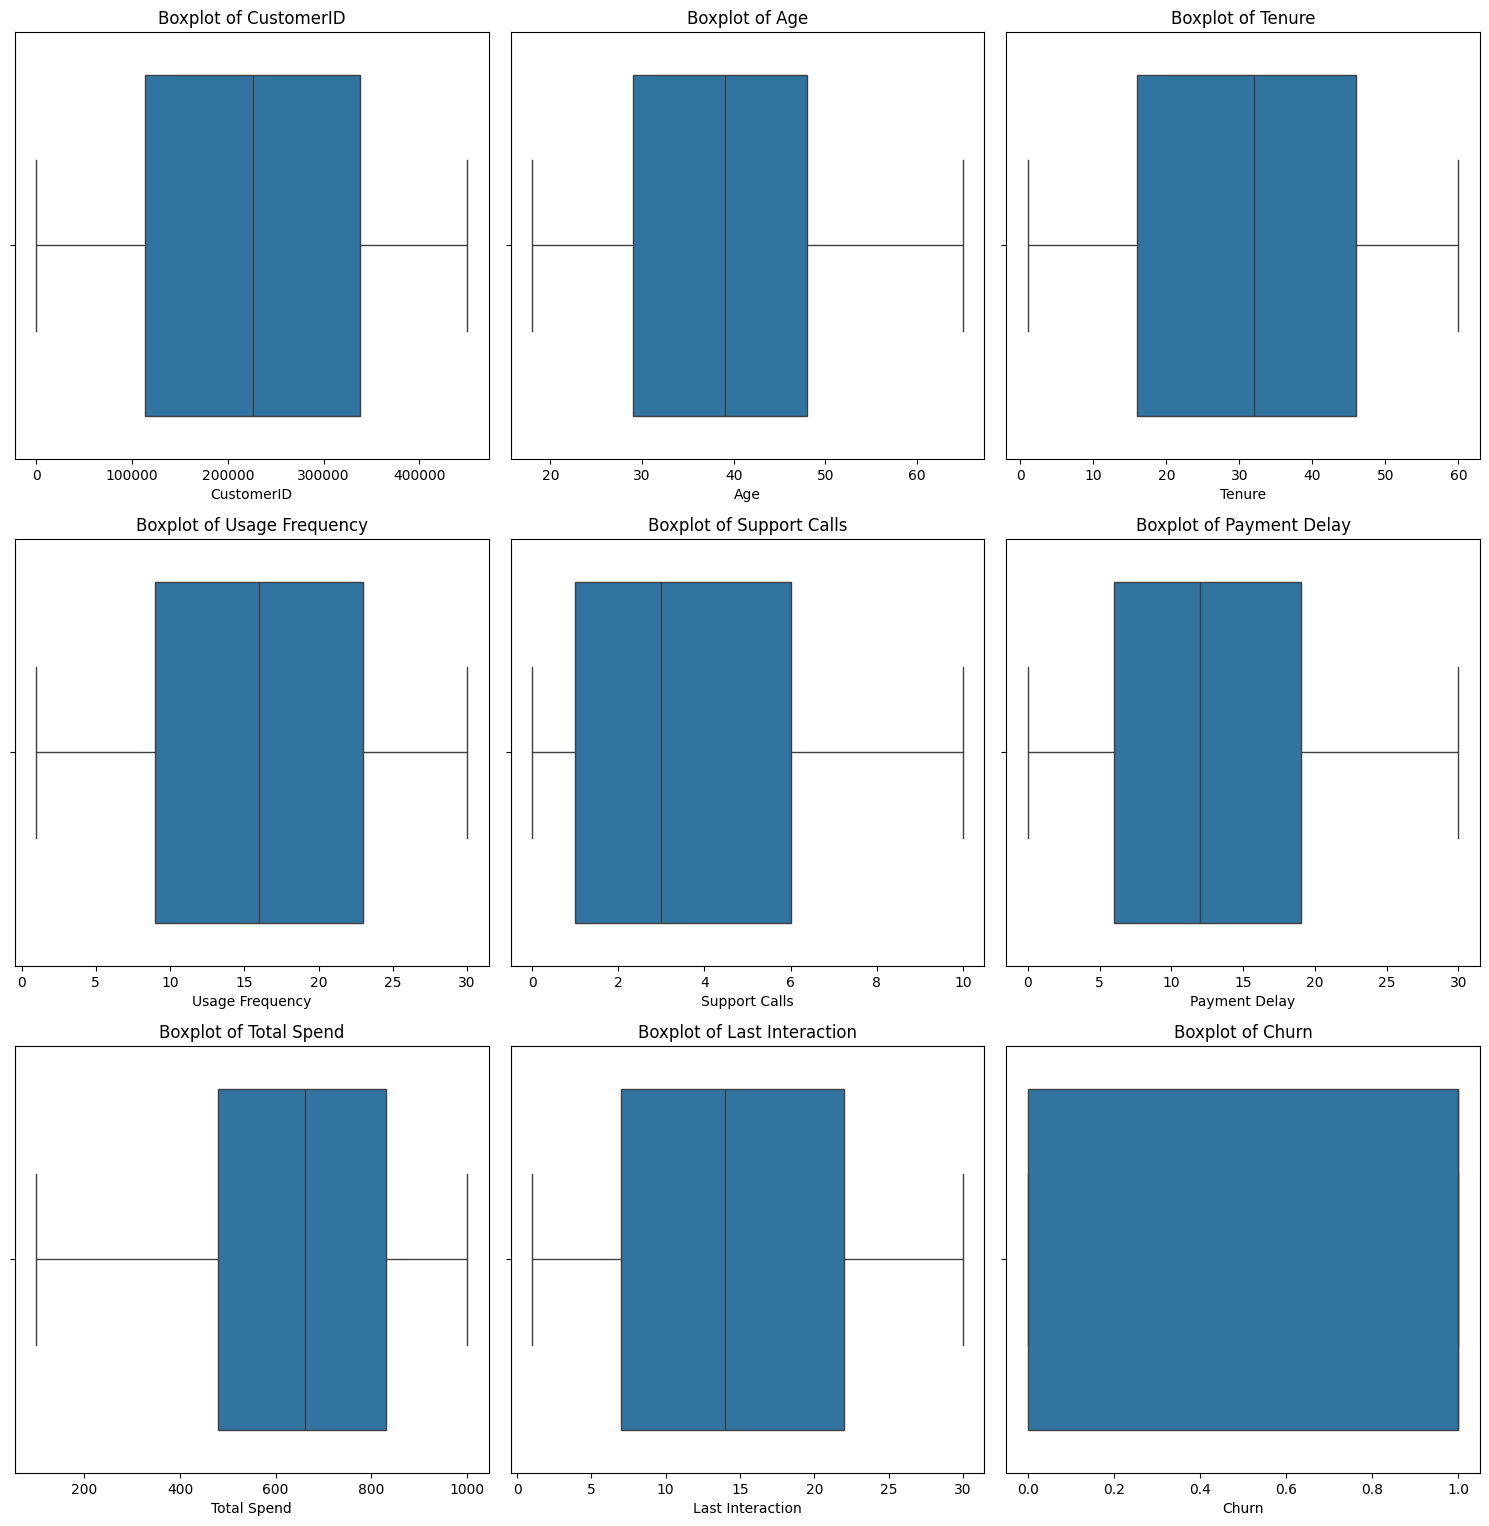

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)
rows = (num_cols // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()
list(map(lambda ax, col: (sns.boxplot(x=df[col], ax=ax), ax.set_title(f'Boxplot of {col}')), axes[:num_cols], numerical_cols))
list(map(fig.delaxes, axes[num_cols:]))

plt.tight_layout()
plt.show()

## Subplots for the Categorical Data

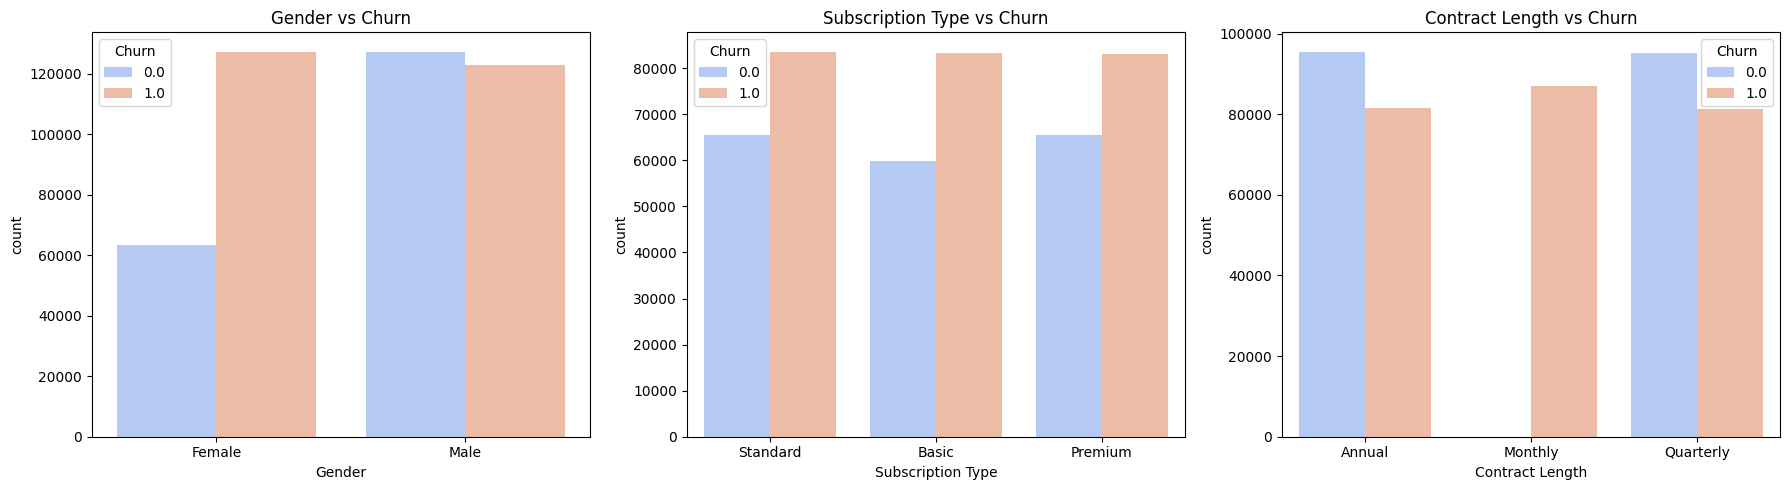

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x="Gender", hue="Churn", data=df_cleaned, palette="coolwarm", ax=axes[0])
axes[0].set_title("Gender vs Churn")
sns.countplot(x="Subscription Type", hue="Churn", data=df_cleaned, palette="coolwarm", ax=axes[1])
axes[1].set_title("Subscription Type vs Churn")
sns.countplot(x="Contract Length", hue="Churn", data=df_cleaned, palette="coolwarm", ax=axes[2])
axes[2].set_title("Contract Length vs Churn")

plt.tight_layout()
plt.show()


## Label Encoding to change the categorical data to Numerical Data and plotting the heatmap

<ipython-input-11-b4979b2aaccc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-11-b4979b2aaccc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
<ipython-input-11-b4979b2aaccc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

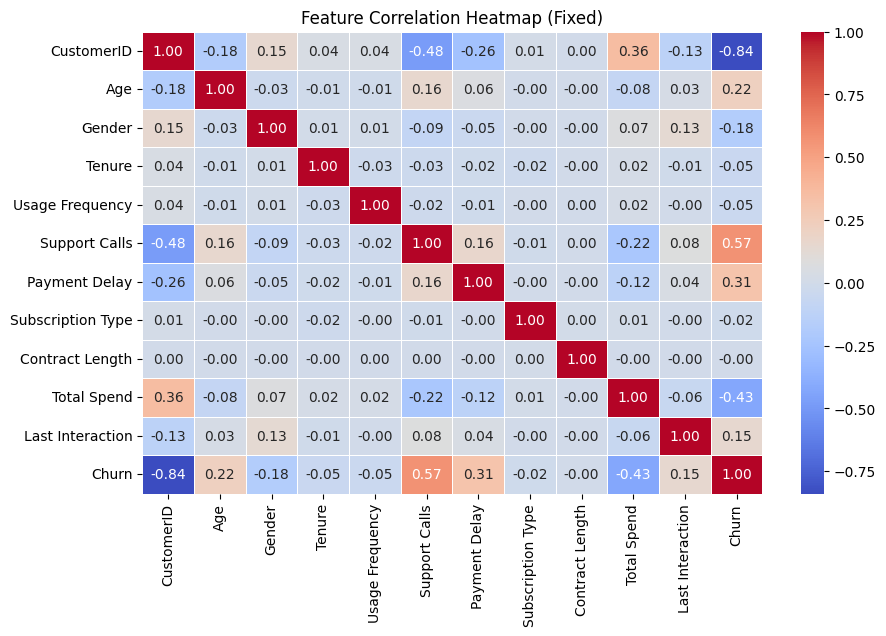

In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Fixed)")
plt.show()


## Splitting and Scaling the data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_cleaned.drop(columns=["CustomerID", "Churn"])
y = df_cleaned["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((352665, 10), (88167, 10), (352665,), (88167,))

## Training the model using Logistic Regression and finding the accuracy

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, report


(0.8510440414213934,
 0.878659025081654,
 0.85548,
 0.8669146036217712,
 '              precision    recall  f1-score   support\n\n         0.0       0.82      0.85      0.83     38167\n         1.0       0.88      0.86      0.87     50000\n\n    accuracy                           0.85     88167\n   macro avg       0.85      0.85      0.85     88167\nweighted avg       0.85      0.85      0.85     88167\n')

## Using Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf, report_rf


(0.9997618156453094,
 0.9999399819945983,
 0.99964,
 0.9997899684952742,
 '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00     38167\n         1.0       1.00      1.00      1.00     50000\n\n    accuracy                           1.00     88167\n   macro avg       1.00      1.00      1.00     88167\nweighted avg       1.00      1.00      1.00     88167\n')

## Barplot for the feature importance for the randomforest classifier

<ipython-input-15-2de0c2ae0b67>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")


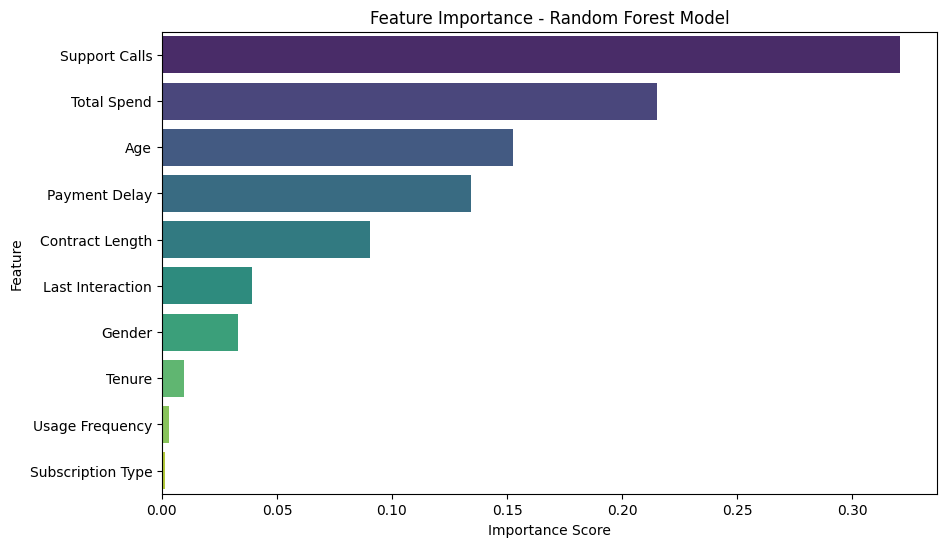

In [15]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
